In [8]:
import pandas as pd
df=pd.read_csv("seed_data.csv")
df

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


# 1. Find the row with the maximum "Area"

In [10]:
import pandas as pd  

max_area_row = df.loc[df['Area'].idxmax()]  

highest_variety = max_area_row['Class']  
highest_area = max_area_row['Area']  
print(f"The wheat variety with the highest 'Area' is '{highest_variety}' with an area of {highest_area}.")


The wheat variety with the highest 'Area' is 'Rosa' with an area of 21.18.


# 2. What is the distribution of wheat classes (Kama, Rosa, and Canadian)?


Distribution of wheat classes:
Class
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64


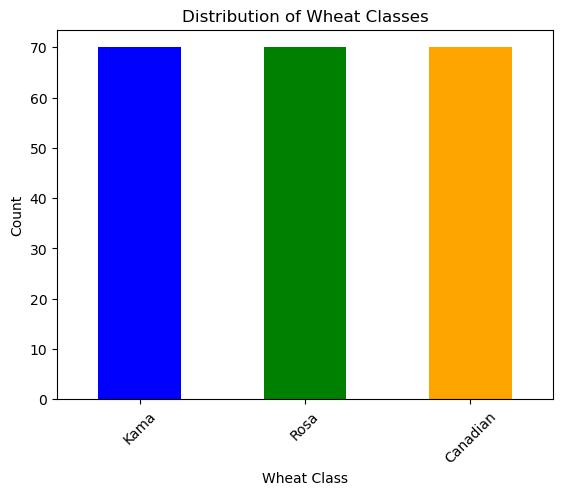

In [12]:
import pandas as pd  

class_distribution = df['Class'].value_counts()  


print("\nDistribution of wheat classes:")  
print(class_distribution)
import matplotlib.pyplot as plt  


class_distribution.plot(kind='bar', color=['blue', 'green', 'orange'])  
plt.title('Distribution of Wheat Classes')  
plt.xlabel('Wheat Class')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show()



# 3. What is the distribution of "Area" across all the wheat varieties?

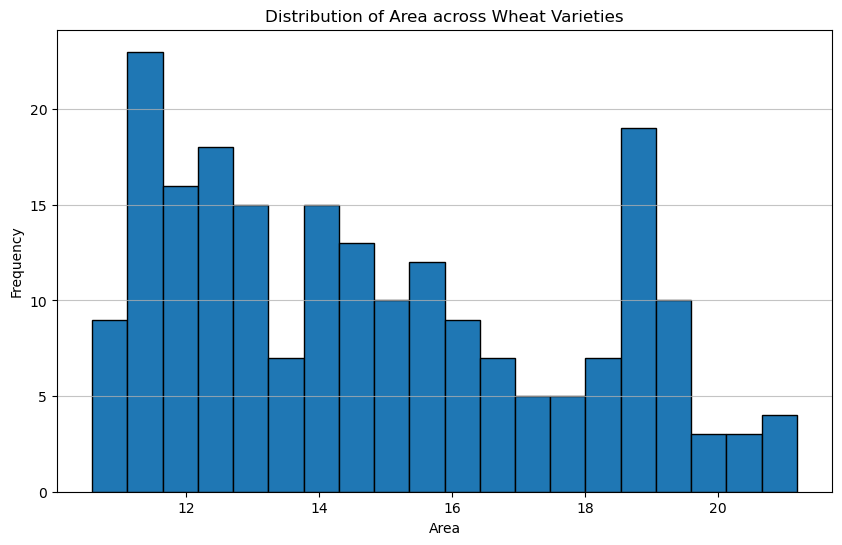

In [15]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
df=pd.read_csv("C:/Users/fiyan/OneDrive/Desktop/Alliance/Data Science/seed_data.csv")

plt.figure(figsize=(10, 6))  
plt.hist(df['Area'], bins=20, edgecolor='black')  
plt.title('Distribution of Area across Wheat Varieties')  
plt.xlabel('Area')  
plt.ylabel('Frequency')  
plt.grid(axis='y', alpha=0.75)  
plt.show()

# 4. What is the correlation between different numerical features (e.g., Area, Perimeter, Kernel Length, etc.)?

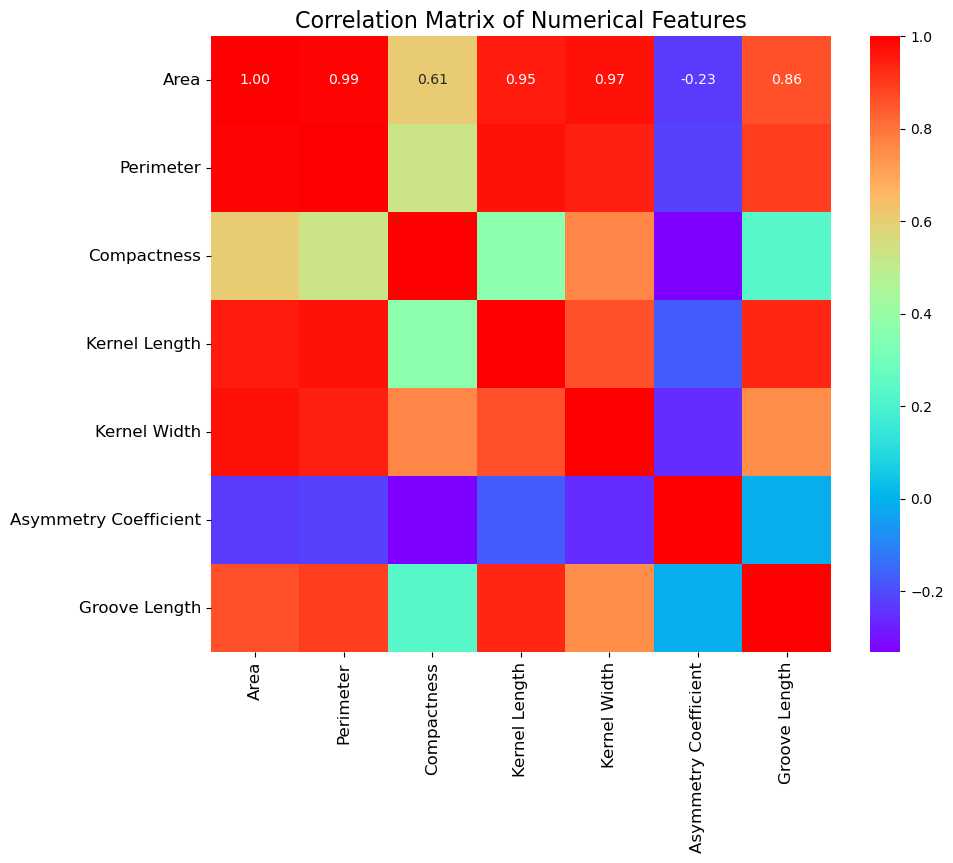

                           Area  Perimeter  Compactness  Kernel Length  \
Area                   1.000000   0.994341     0.608288       0.949985   
Perimeter              0.994341   1.000000     0.529244       0.972422   
Compactness            0.608288   0.529244     1.000000       0.367915   
Kernel Length          0.949985   0.972422     0.367915       1.000000   
Kernel Width           0.970771   0.944829     0.761635       0.860415   
Asymmetry Coefficient -0.229572  -0.217340    -0.331471      -0.171562   
Groove Length          0.863693   0.890784     0.226825       0.932806   

                       Kernel Width  Asymmetry Coefficient  Groove Length  
Area                       0.970771              -0.229572       0.863693  
Perimeter                  0.944829              -0.217340       0.890784  
Compactness                0.761635              -0.331471       0.226825  
Kernel Length              0.860415              -0.171562       0.932806  
Kernel Width               

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="rainbow", cbar=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print(correlation_matrix)

# 5. Are there any outliers in the "Area" for each wheat variety?


Outliers for Canadian:
No outliers found.

Outliers for Kama:
     Area  Perimeter  Compactness  Kernel Length  Kernel Width  \
37  17.08      15.38       0.9079          5.832         3.683   
60  11.42      12.86       0.8683          5.008         2.850   
61  11.23      12.63       0.8840          4.902         2.879   

    Asymmetry Coefficient  Groove Length Class  
37                  2.956          5.484  Kama  
60                  2.700          4.607  Kama  
61                  2.269          4.703  Kama  

Outliers for Rosa:
No outliers found.


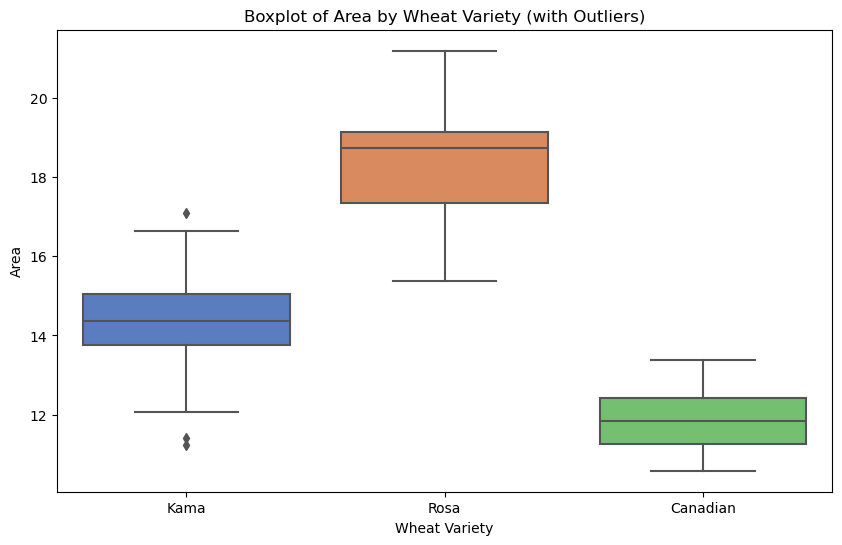

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

outliers = {}
for variety, group in df.groupby("Class"):
    Q1 = group["Area"].quantile(0.25)  
    Q3 = group["Area"].quantile(0.75) 
    IQR = Q3 - Q1 
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[variety] = group[(group["Area"] < lower_bound) | (group["Area"] > upper_bound)]

for variety, outlier_data in outliers.items():
    print(f"\nOutliers for {variety}:")
    print(outlier_data if not outlier_data.empty else "No outliers found.")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Class", y="Area", palette="muted")
plt.title("Boxplot of Area by Wheat Variety (with Outliers)")
plt.xlabel("Wheat Variety")
plt.ylabel("Area")
plt.show()